In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

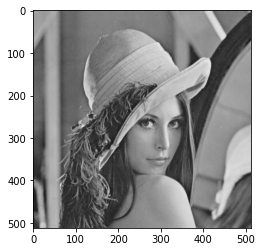

In [2]:
# Leitura da imagem
img = cv2.imread('./img/lena512.pgm',0)
plt.imshow(img, cmap = 'gray', clim=(0, 255))

In [4]:
# Escrita de imagem
with open('file', "w") as file:
    img.tofile(file)

In [3]:
# psnr
def psnr(img1, img2):
    dif = img1 - img2
    dif = dif.astype(int)
    mse = (dif**2).mean()
    return (10* np.log10((255*255)/(mse+0.0000000001)))

In [ ]:
files = os.listdir('img')
files

for file in files:
    filepath = './img/' + file
    img = cv2.imread(filepath, 0)
    if img is None:
        continue
    
    print(img.shape, filepath)
    # plt.imshow(img, cmap = 'gray', clim=(0, 255))